# IF3170 Artificial Intelligence | Praktikum

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 10

Group Members:
- Bagas Sambega Rosyada (13522071)
- Raden Francisco Trianto Bratadiningrat (13522091)

## Import Libraries

In [ ]:
from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Function to display markdown
def print_markdown(md_text: str) -> None:
    display(Markdown(md_text))

## Import Dataset

In [ ]:
df_train: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=18igdZJhD4iezFB-BzVAQ1KRLt4y78BBM')
df_test: pd.DataFrame = pd.read_csv('https://drive.google.com/uc?id=18lVckuMh8bWzu0iEvgYBoFcTWmmvyOGs')

df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1170.0,D-penicillamine,23741.0,F,Y,Y,N,Y,5.2,NaN,2.80,108.0,1790.0,151.90,NaN,110.0,12.4,4.0,D
1,1,1786.0,Placebo,25329.0,F,N,Y,N,N,1.9,302.0,3.67,52.0,1866.0,97.65,164.0,329.0,9.9,2.0,C
2,2,1067.0,NaN,15706.0,F,NaN,NaN,NaN,N,0.6,NaN,3.73,NaN,NaN,NaN,NaN,269.0,9.8,3.0,C
3,3,4062.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.6,NaN,3.65,NaN,NaN,NaN,NaN,388.0,11.5,4.0,C
4,4,1067.0,Placebo,11773.0,F,N,Y,N,N,0.6,346.0,3.80,81.0,1257.0,122.45,90.0,318.0,10.9,2.0,C


# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## 1) Data Size


In [ ]:
print(f"Number of instances: {df_train.shape[0]} | Number of features: {df_train.shape[1] - 2}") # -2 for id and target
print(f"Number of target class: 1")

Number of instances: 15000 | Number of features: 18
Number of target class: 1


## 2) Features and Target


In [ ]:
target_col: list[str] = ["Status"]
not_features: list[str] = ["N_Days"]
categorical_features: list[str] = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema", "Stage"]
numerical_features: list[str] = [col for col in df_train.columns if col not in categorical_features and col not in target_col and col != 'id' and col not in not_features]

df_categorical: pd.DataFrame = df_train[categorical_features]
df_numeric: pd.DataFrame = df_train[numerical_features]

print("Target Collumn:", target_col)
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Target Collumn: ['Status']
Categorical Features: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
Numerical Features: ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


## 3) Data Types

In [ ]:
print(df_train.dtypes.to_string())

id                 int64
N_Days           float64
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object


## 4) Missing Values

In [ ]:
missing_counts = df_train.isnull().sum()
total_rows = len(df_train)

# Calculate the percentage of missing data for each column
missing_percentage = (missing_counts / total_rows) * 100

missing_data_summary = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage})

# Sort by the percentage of missing data (optional)
missing_data_summary = missing_data_summary.sort_values(by='Percentage', ascending=False)

print(missing_data_summary)


               Missing Values  Percentage
Tryglicerides            8425   56.166667
Cholesterol              8374   55.826667
Copper                   6660   44.400000
Spiders                  6559   43.726667
SGOT                     6559   43.726667
Alk_Phos                 6556   43.706667
Hepatomegaly             6552   43.680000
Drug                     6550   43.666667
Ascites                  6547   43.646667
Platelets                 584    3.893333
Prothrombin                16    0.106667
Stage                       0    0.000000
id                          0    0.000000
Albumin                     0    0.000000
N_Days                      0    0.000000
Bilirubin                   0    0.000000
Edema                       0    0.000000
Sex                         0    0.000000
Age                         0    0.000000
Status                      0    0.000000


## 5) Unique Values for Categorical

In [ ]:
for col in categorical_features:
    print(f"Column {col}: {df_train[col].dropna().nunique()}")

Column Drug: 2
Column Sex: 2
Column Ascites: 2
Column Hepatomegaly: 3
Column Spiders: 2
Column Edema: 3
Column Stage: 4


## 6) Value Distribution

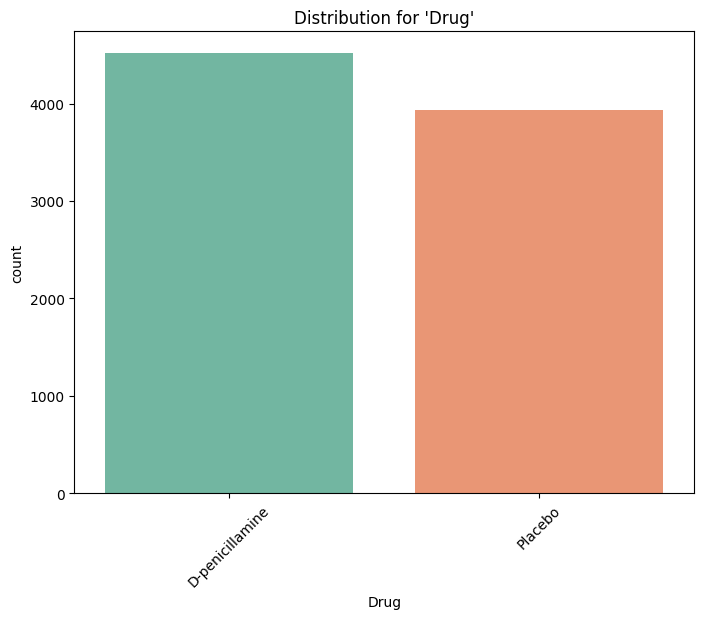

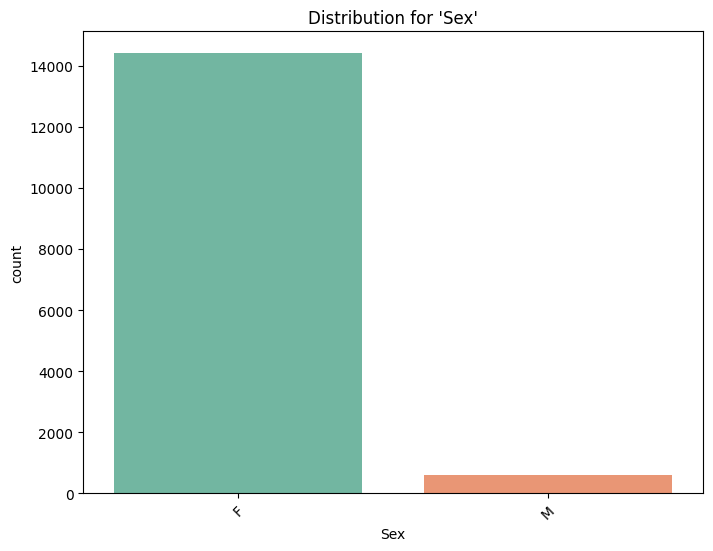

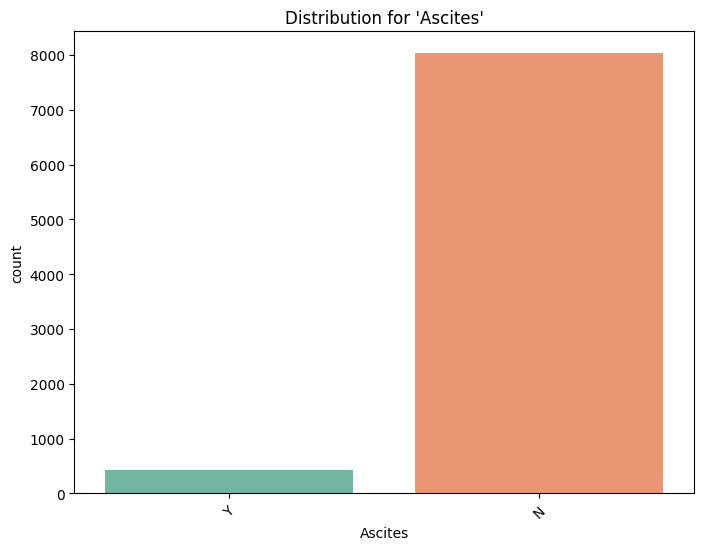

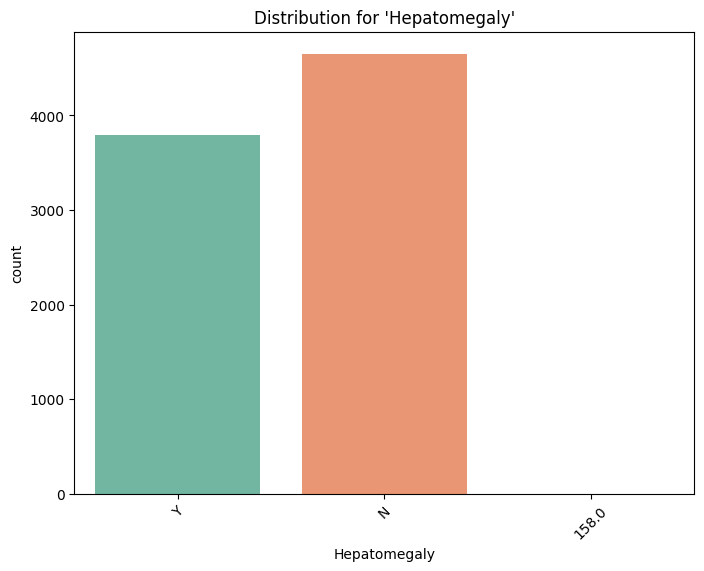

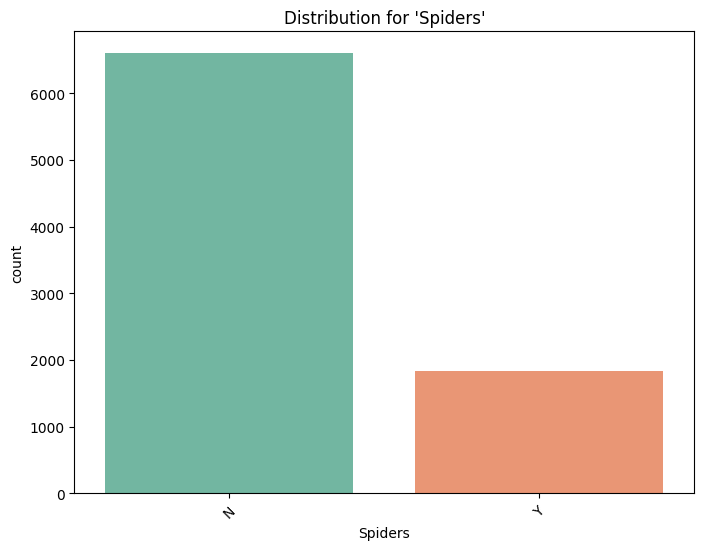

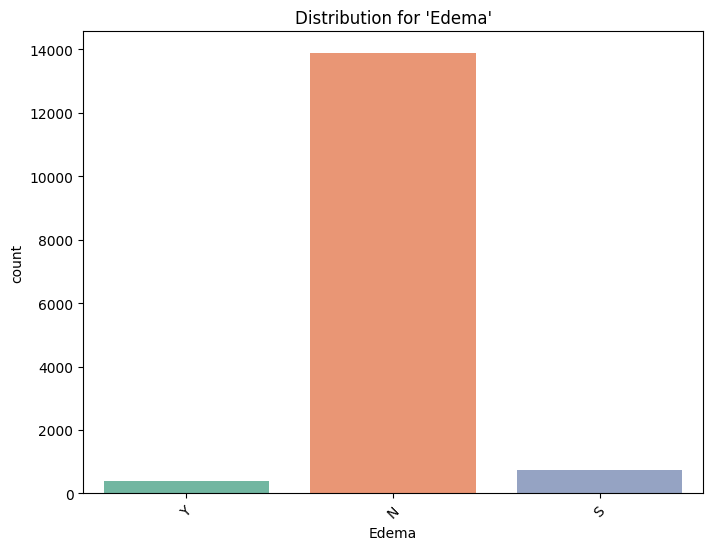

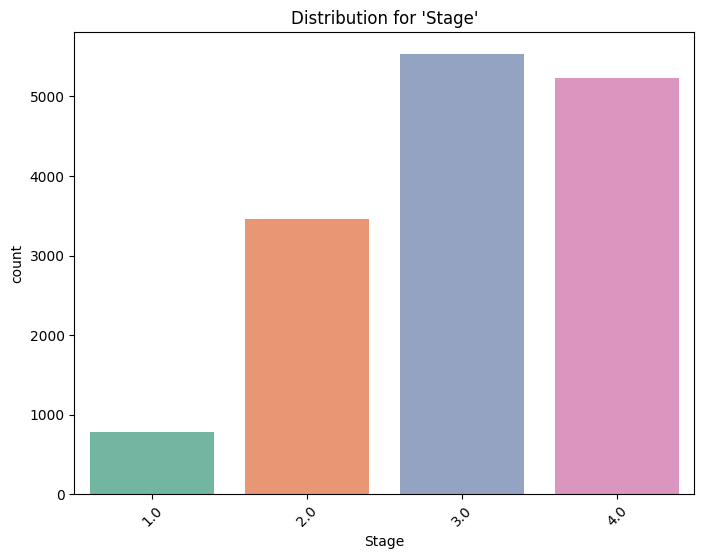

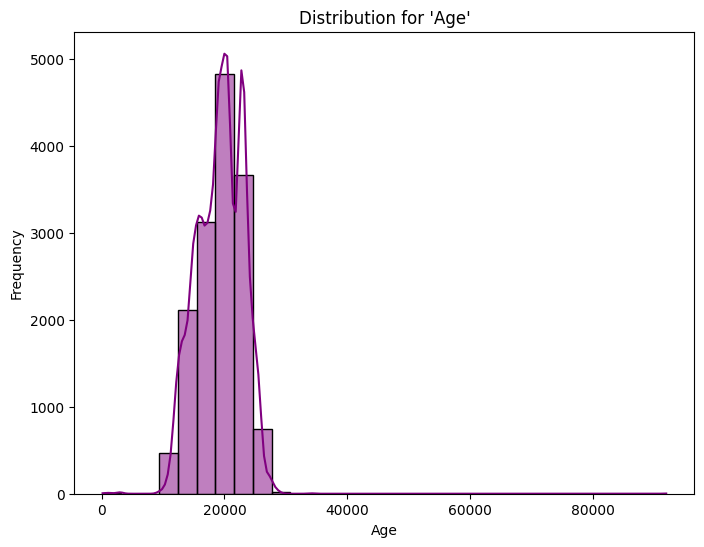

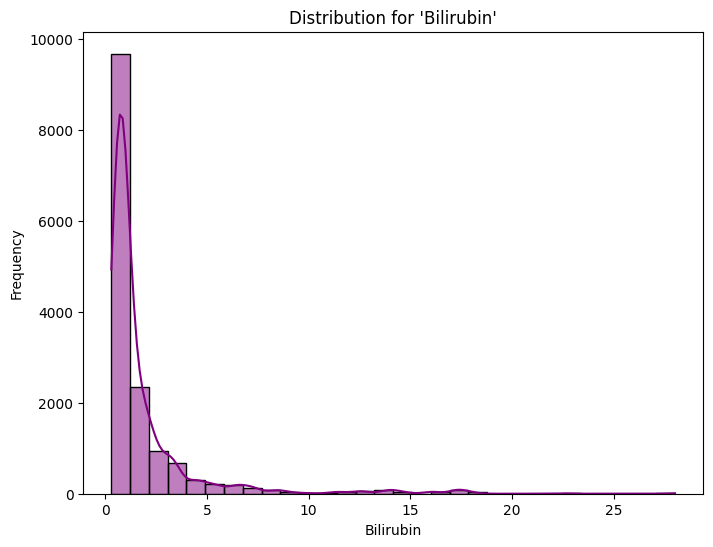

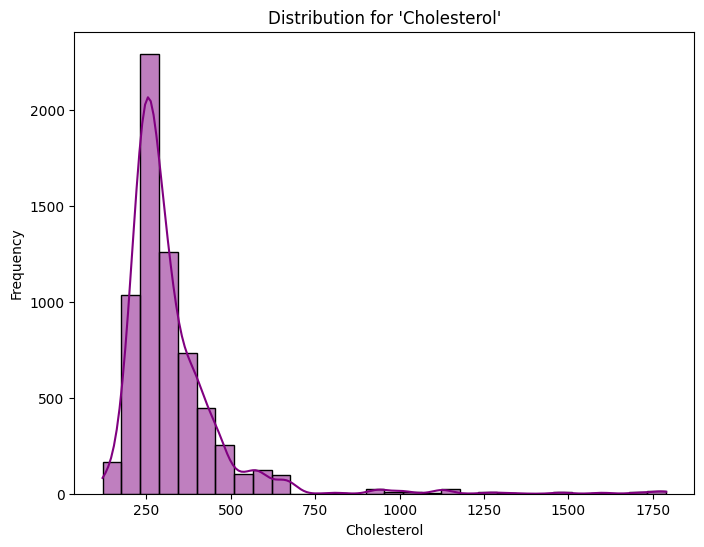

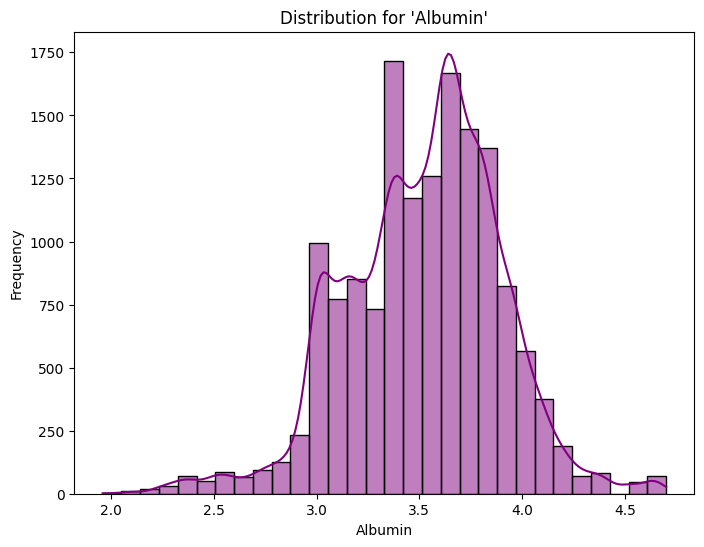

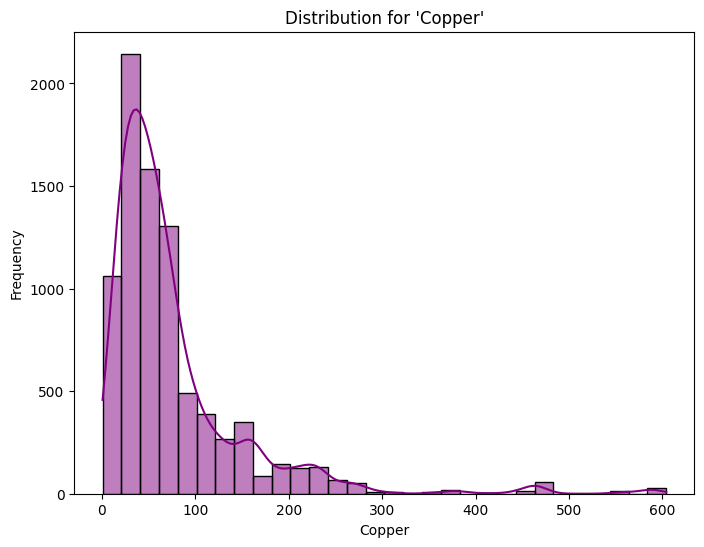

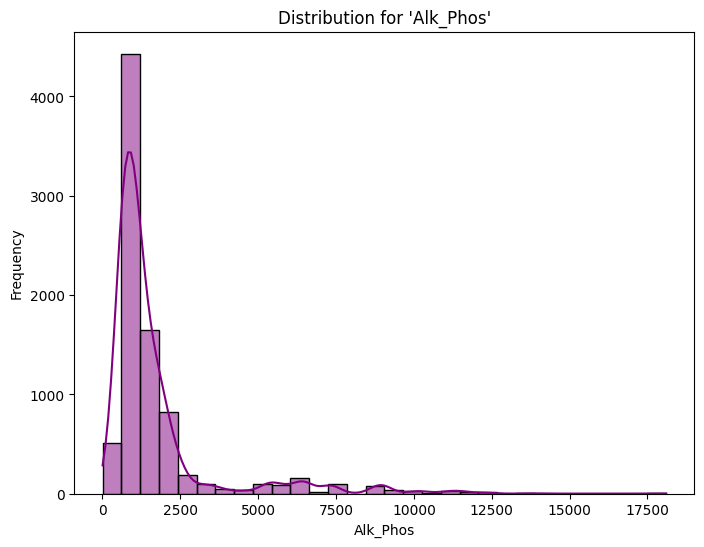

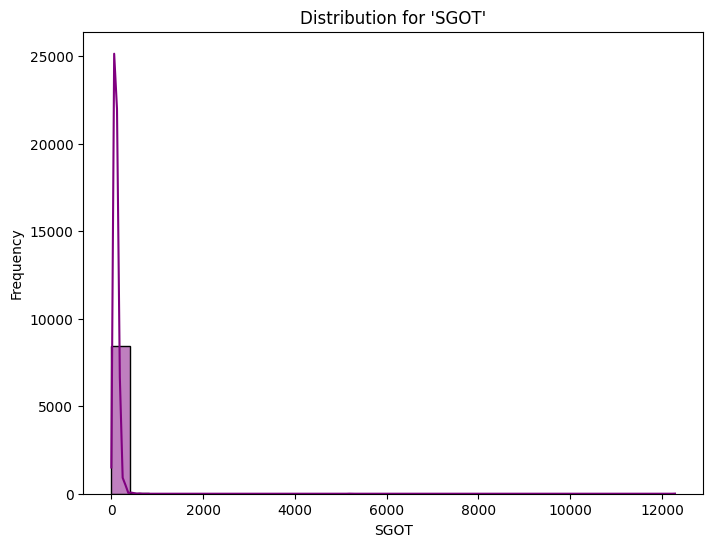

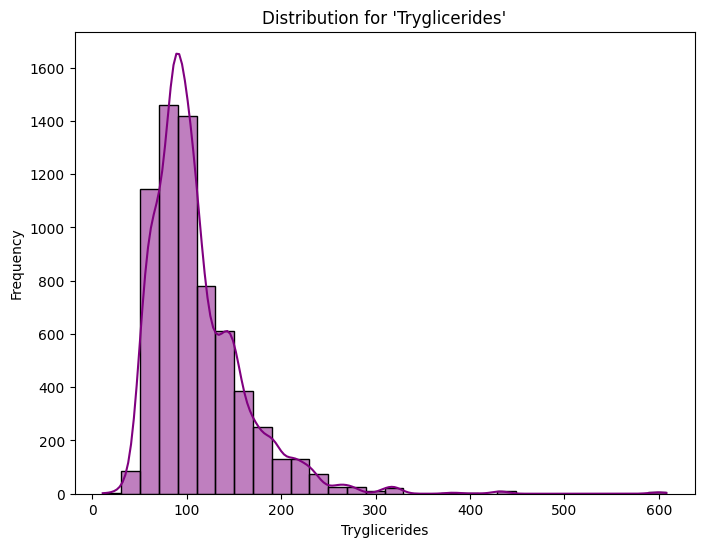

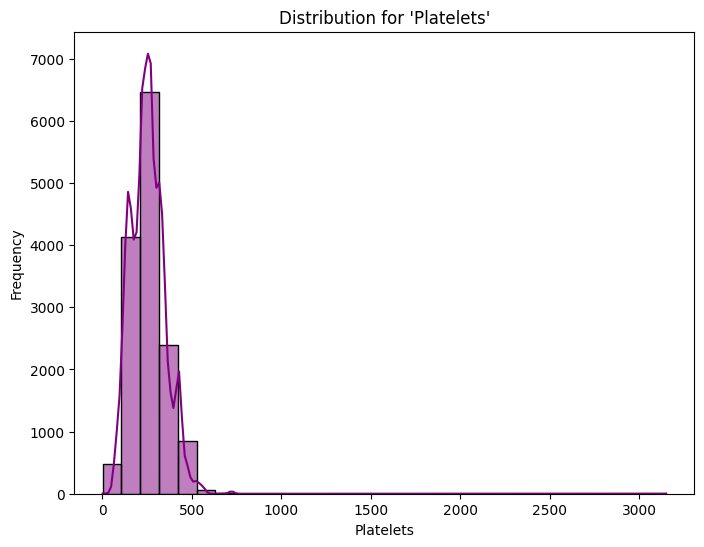

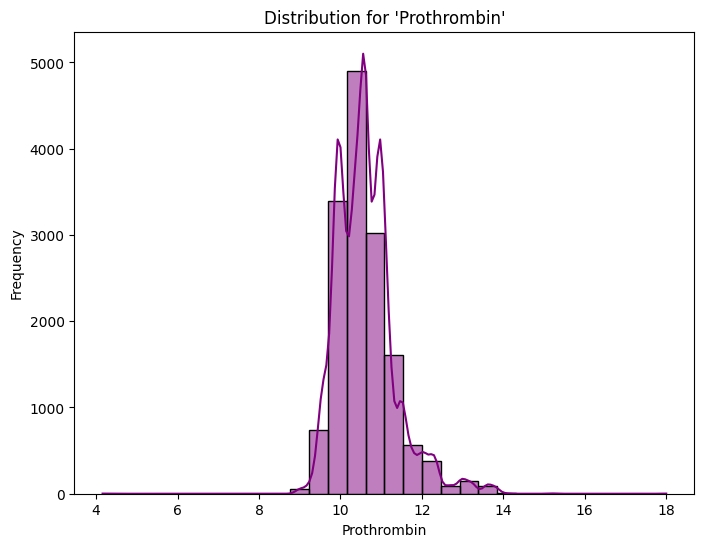

In [ ]:
# Categorical column distribution plot
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df_train[col].dropna(), palette='Set2', hue=df_train[col], legend=False)
    plt.title(f"Distribution for '{col}'")
    plt.xticks(rotation=45)
    plt.show()

# Numerical column distribution plot (using histograms)
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col].dropna(), kde=True, bins=30, color='purple')
    plt.title(f"Distribution for '{col}'")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## 7) Outliers

In [ ]:
# Outlier detection for numerical features (IQR method)
for col in numerical_features:
    print(f"\nOutliers detection for '{col}':")

    # Calculate Q1, Q3, and IQR
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_percentage = (outlier_count / total_rows) * 100

    print(f"Number of outliers: {outlier_count} | Percentage of outliers: {outlier_percentage:.2f}%")


Outliers detection for 'Age':
Number of outliers: 16 | Percentage of outliers: 0.11%

Outliers detection for 'Bilirubin':
Number of outliers: 1577 | Percentage of outliers: 10.51%

Outliers detection for 'Cholesterol':
Number of outliers: 384 | Percentage of outliers: 2.56%

Outliers detection for 'Albumin':
Number of outliers: 353 | Percentage of outliers: 2.35%

Outliers detection for 'Copper':
Number of outliers: 695 | Percentage of outliers: 4.63%

Outliers detection for 'Alk_Phos':
Number of outliers: 845 | Percentage of outliers: 5.63%

Outliers detection for 'SGOT':
Number of outliers: 208 | Percentage of outliers: 1.39%

Outliers detection for 'Tryglicerides':
Number of outliers: 291 | Percentage of outliers: 1.94%

Outliers detection for 'Platelets':
Number of outliers: 136 | Percentage of outliers: 0.91%

Outliers detection for 'Prothrombin':
Number of outliers: 392 | Percentage of outliers: 2.61%


## 8) Mean, Median, Average, Min, Max for Numerical Features

In [ ]:
df_train[numerical_features].describe()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,15000.000000,15000.000000,6626.000000,15000.000000,8340.000000,8444.000000,8441.000000,6575.000000,14416.000000,14984.000000
mean,19298.427133,1.862907,322.805916,3.520585,76.395725,1676.897656,108.214094,110.670418,254.266294,10.624837
std,3706.122475,2.763713,163.041117,0.373807,76.662546,1882.904216,152.099011,49.828478,96.081587,0.729726
min,174.000000,0.300000,120.000000,1.960000,0.900000,3.410000,0.900000,11.000000,0.900000,4.160000
25%,16463.000000,0.700000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,189.000000,10.100000
50%,19577.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000
75%,22388.000000,1.800000,360.000000,3.770000,89.000000,1689.000000,130.200000,133.000000,312.000000,11.000000
max,91894.000000,28.000000,1790.000000,4.700000,604.000000,18102.000000,12285.000000,608.000000,3150.000000,18.000000


## 9) Correlations between Features

Correlation between features only for non-categorical columns


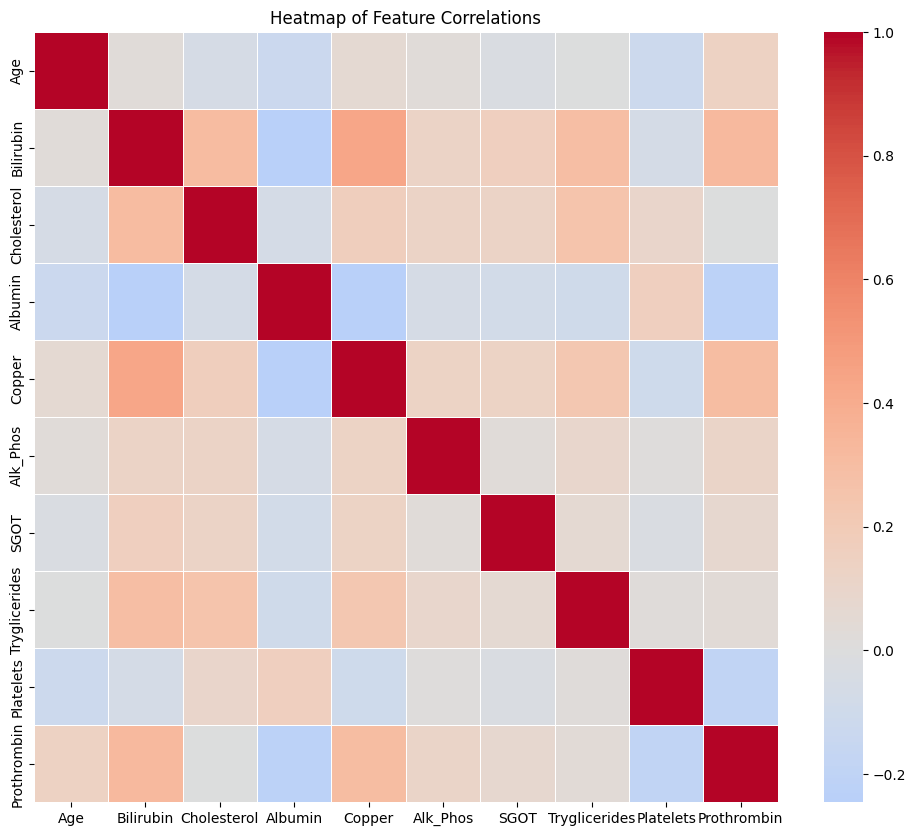

                    Age  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos  \
Age            1.000000   0.030105    -0.055847 -0.126212  0.060118  0.028081   
Bilirubin      0.030105   1.000000     0.308142 -0.244092  0.432316  0.121413   
Cholesterol   -0.055847   0.308142     1.000000 -0.062155  0.172749  0.123650   
Albumin       -0.126212  -0.244092    -0.062155  1.000000 -0.245559 -0.054677   
Copper         0.060118   0.432316     0.172749 -0.245559  1.000000  0.129505   
Alk_Phos       0.028081   0.121413     0.123650 -0.054677  0.129505  1.000000   
SGOT          -0.030174   0.161446     0.119827 -0.079386  0.124241  0.030975   
Tryglicerides -0.004866   0.295824     0.251783 -0.098497  0.228300  0.093581   
Platelets     -0.121577  -0.068088     0.095838  0.159838 -0.103288  0.011612   
Prothrombin    0.143653   0.320744    -0.006515 -0.221566  0.300005  0.112693   

                   SGOT  Tryglicerides  Platelets  Prothrombin  
Age           -0.030174      -0.004866  -0.

In [ ]:
print("Correlation between features only for non-categorical columns")
correlation = df_numeric.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

plt.title("Heatmap of Feature Correlations")
plt.show()

print(correlation)

#### Visualization of Correlation between Categorical Features and Non-Categorical Features

##### Correlation between Drug and non-categorical columns

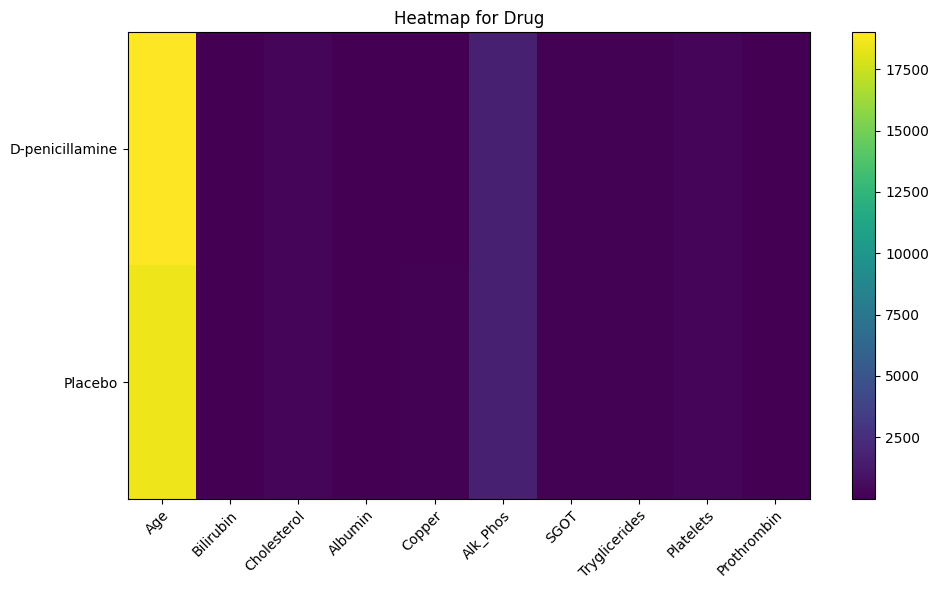

##### Correlation between Sex and non-categorical columns

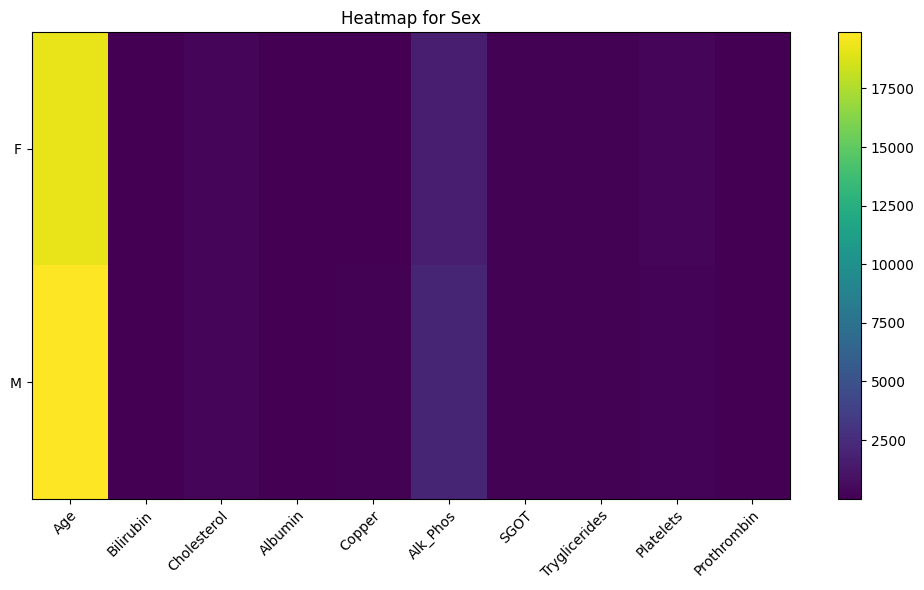

##### Correlation between Ascites and non-categorical columns

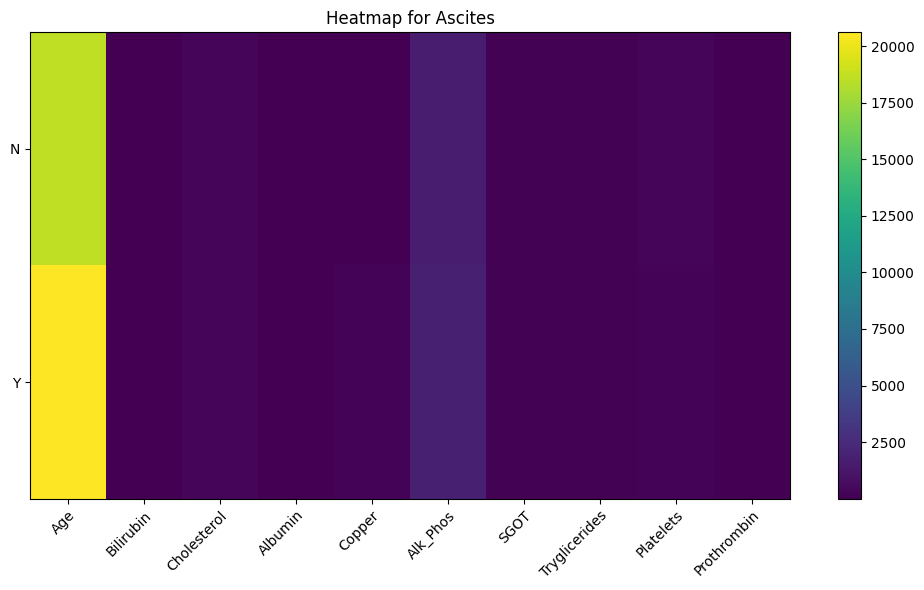

##### Correlation between Hepatomegaly and non-categorical columns

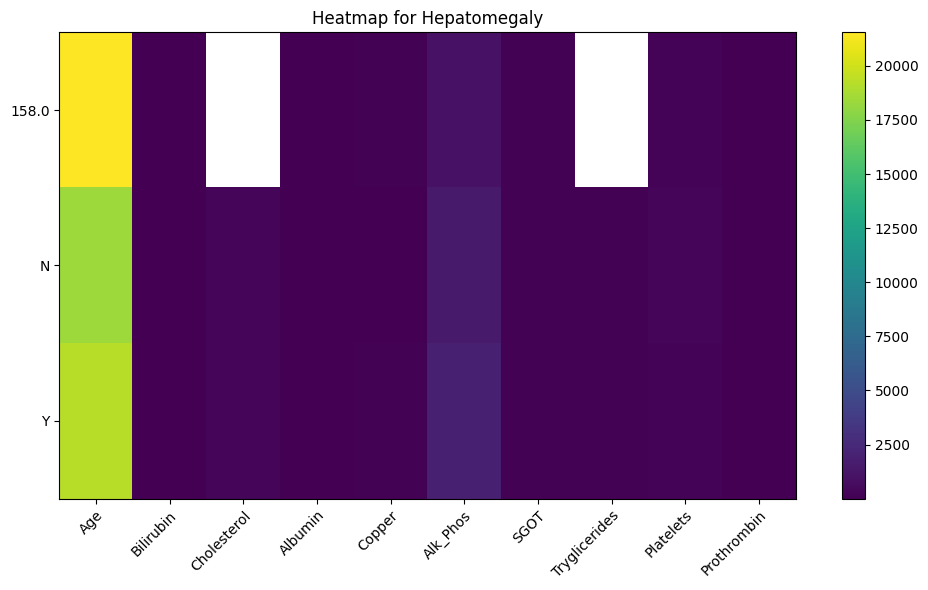

##### Correlation between Spiders and non-categorical columns

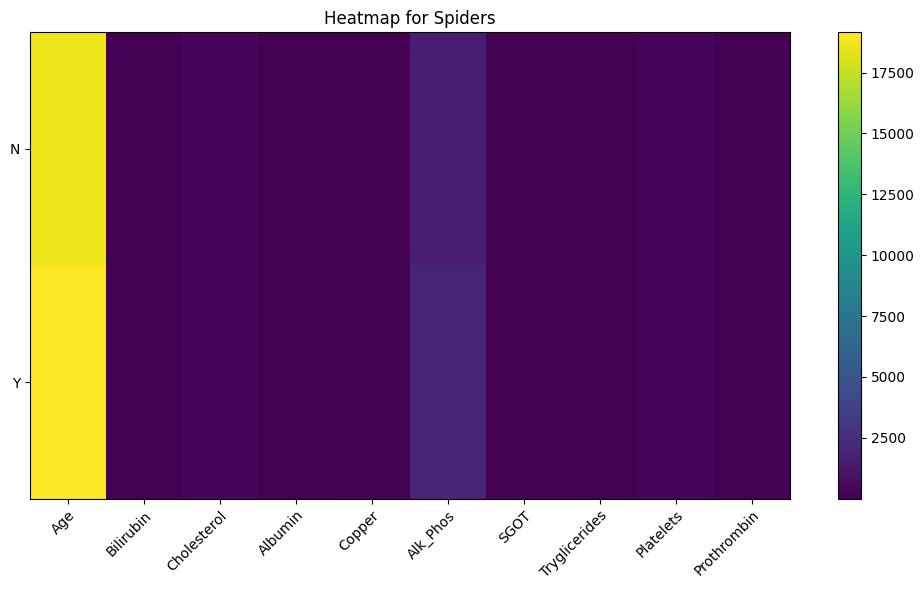

##### Correlation between Edema and non-categorical columns

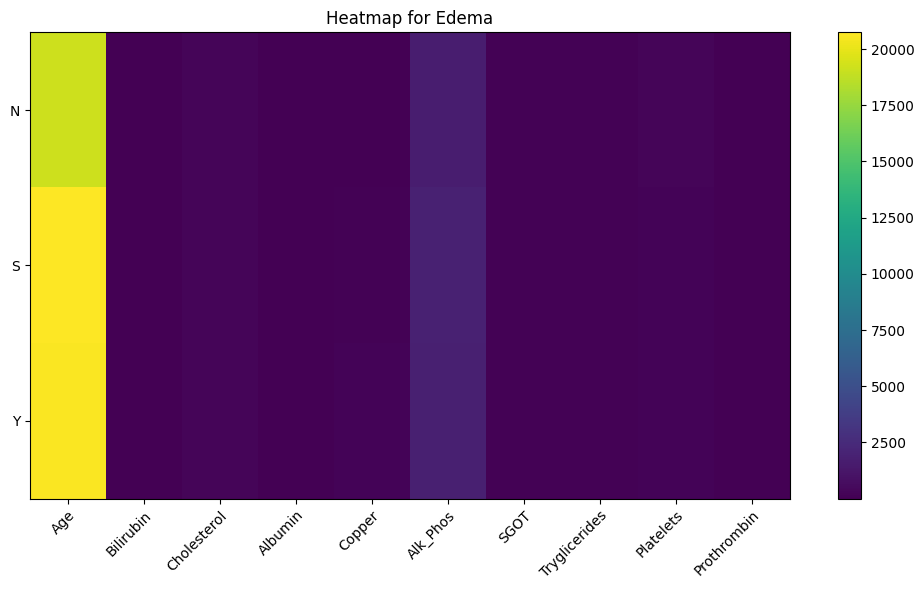

##### Correlation between Stage and non-categorical columns

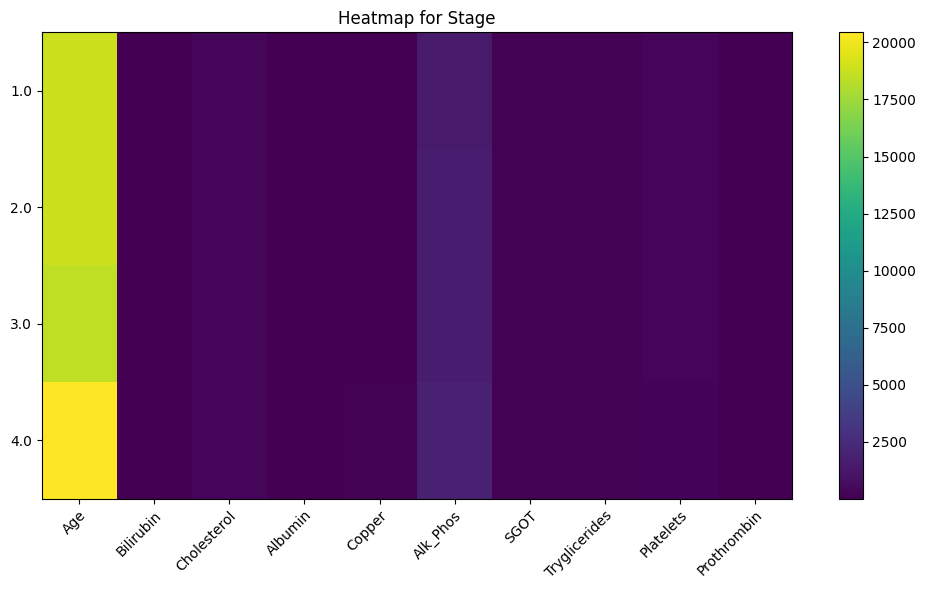

In [ ]:
print_markdown("#### Visualization of Correlation between Categorical Features and Non-Categorical Features")

for cat_col in categorical_features:
    print_markdown(f"##### Correlation between {cat_col} and non-categorical columns")
    pivot_table = df_train.groupby(cat_col)[numerical_features].mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(pivot_table, aspect="auto", cmap="viridis")

    ax.set_xticks(np.arange(len(numerical_features)), labels=numerical_features)
    ax.set_yticks(np.arange(len(pivot_table.index)), labels=pivot_table.index)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    for i in range(len(pivot_table.index)):
        for j in range(len(numerical_features)):
            text = ax.text(j, i, "", ha="center", va="center", color="w")

    ax.set_title(f"Heatmap for {cat_col}")
    fig.tight_layout()
    plt.colorbar(im)
    plt.show()



#### Visualization of Correlation between Non-Categorical Features and Target Variable

##### Correlation between Status column and non-categorical columns

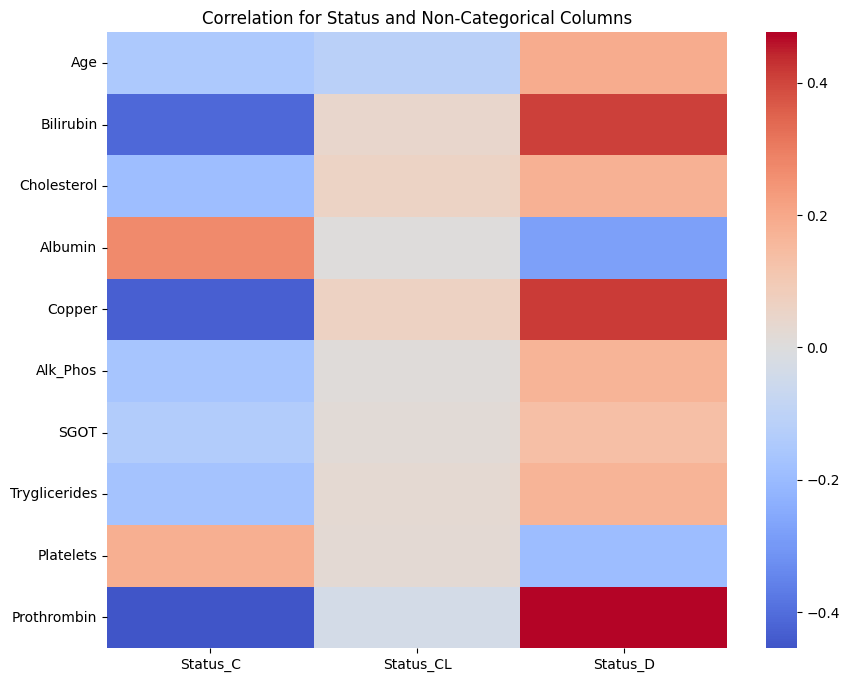

In [ ]:
print_markdown("#### Visualization of Correlation between Non-Categorical Features and Target Variable")
for target in target_col:
    print_markdown(f"##### Correlation between {target} column and non-categorical columns")
    df_encoded = pd.get_dummies(df_train[target], prefix=target)

    df_combined = pd.concat([df_train[numerical_features], df_encoded], axis=1)
    correlation_matrix = df_combined.corr()
    correlations = correlation_matrix.loc[numerical_features, df_encoded.columns]
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=False, cmap="coolwarm", center=0)
    plt.title(f"Correlation for {target} and Non-Categorical Columns")
    plt.show()

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train.csv` given by the TA. The `test.csv` data is only used for kaggle submission.

In [ ]:
print_markdown("### Using K-Fold Validation")

train_df = df_train

### Using K-Fold Validation

# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

### 1. Handling Missing Data: Imputation by mean and mode

The current dataset contain's a lot of missing values and can effect the resulted model. Thus we need to handle missing values.

In [ ]:
shape_before_cleaning = train_df.shape

# Store the count of missing values before imputation
missing_before = train_df.isnull().sum()

# Impute missing values in numerical features with mean
num_imputer = SimpleImputer(strategy='mean')
train_df[numerical_features] = num_imputer.fit_transform(train_df[numerical_features])

# Impute missing values in categorical features with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
train_df[categorical_features] = cat_imputer.fit_transform(train_df[categorical_features])

# Store the count of missing values after imputation
missing_after = train_df.isnull().sum()

# Create a DataFrame to display the before and after results
missing_summary = pd.DataFrame({
    'Before Imputation': missing_before,
    'After Imputation': missing_after
})


# Display the summary as a table
print_markdown("#### Handling Missing Data by Imputation")

print_markdown("#### Missing Data Before and After Imputation:")
print(missing_summary)


#### Handling Missing Data by Imputation

#### Missing Data Before and After Imputation:

               Before Imputation  After Imputation
id                             0                 0
N_Days                         0                 0
Drug                           0                 0
Age                            0                 0
Sex                            0                 0
Ascites                        0                 0
Hepatomegaly                   0                 0
Spiders                        0                 0
Edema                          0                 0
Bilirubin                      0                 0
Cholesterol                    0                 0
Albumin                        0                 0
Copper                         0                 0
Alk_Phos                       0                 0
SGOT                           0                 0
Tryglicerides                  0                 0
Platelets                      0                 0
Prothrombin                    0                 0
Stage                          

#### 2. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

In [ ]:
# Step 1: Removing data outside IQR
for feature in numerical_features:
    Q1 = train_df[feature].quantile(0.25)
    Q3 = train_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove values outside the bounds
    train_df = train_df[(train_df[feature] >= lower_bound) & (train_df[feature] <= upper_bound)]
# Step 2: Outlier Detection with Isolation Forest
rows_before_isoforest = train_df.shape[0]
iso_forest = IsolationForest(contamination=0.1, random_state=42, n_estimators=300)
outliers = iso_forest.fit_predict(train_df[numerical_features])

# Mask for outliers detected by Isolation Forest
outlier_mask = outliers == -1

# Remove rows identified as outliers
train_df = train_df[~outlier_mask]

# Step 3: Summary
rows_after_isoforest = train_df.shape[0]
rows_removed_isoforest = rows_before_isoforest - rows_after_isoforest

print(f"Data removed using IQR")
print(f"Data removed by Isolation Forest: {rows_removed_isoforest} rows")
print(f"Total Result Data: {train_df.shape[0]} rows")

Data removed using IQR
Data removed by Isolation Forest: 506 rows
Total Result Data: 4549 rows


### 3. Data Validation

Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

In [ ]:

print(f"Current Data Amount:{train_df.shape[0]}")

### Validate Categorical Data
train_df = train_df[train_df['Drug'].isin(['D-penicillamine', 'Placebo'])]
train_df = train_df[train_df['Sex'].isin(['M', 'F'])]
train_df = train_df[train_df['Ascites'].isin(['N', 'Y'])]
train_df = train_df[train_df['Hepatomegaly'].isin(['N', 'Y'])]
train_df = train_df[train_df['Spiders'].isin(['N', 'Y'])]
train_df = train_df[train_df['Edema'].isin(['N', 'S', 'Y'])]
train_df = train_df[train_df['Stage'].isin([1, 2, 3, 4])]

print(f"Filtered Data Result:{train_df.shape[0]}")


Current Data Amount:5087
Filtered Data Result:5087


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import pandas as pd

# Fill the value of NaN
# Fit numerical
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Call categorical and numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# K Fold Cross Validatioin

# Define features and target
X = df_train.drop(columns=target_col)
Y = df_train[target_col]
X_test = df_test.drop(columns=['id'])
X_id = df_test['id']

def validate(model, X, Y, file_name):
  log_losses = []
  kf = KFold(n_splits=10, shuffle=True, random_state=42)
  fold = 1

  for train_index, val_index in kf.split(X):
    # Split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]

    # Ensure Y_train is a 1D array
    Y_train = Y_train.values.ravel()  # Flatten to 1D array if needed

    # Fit the model
    model.fit(X_train, Y_train)

    # Predict probabilities for validation set
    Y_pred_proba = model.predict_proba(X_val)

    # Calculate log loss
    loss = log_loss(Y_val, Y_pred_proba)
    log_losses.append(loss)

    print(f"Fold {fold}, Log Loss: {loss:.4f}")
    fold += 1

  # Average Log Loss
  average_log_loss = sum(log_losses) / len(log_losses)
  print(f"\nAverage Log Loss: {average_log_loss:.4f}")

  test_probabilities = model.predict_proba(X_test)
  test_prob_df = pd.DataFrame(test_probabilities, columns=[f"Status_{cls}" for cls in model.classes_])
  test_prob_df.insert(0, 'id', X_id)
  test_prob_df.to_csv(file_name+".csv", index=True)
  print(f"File saved to {file_name}")

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the probability for each class in the `Status` feature (`Status_C`, `Status_CL`, `Status_D`). Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=10))
])
validate(knn_pipeline, X, Y, "knn")


Fold 1, Log Loss: 1.3476
Fold 2, Log Loss: 1.2938
Fold 3, Log Loss: 1.4200
Fold 4, Log Loss: 1.4501
Fold 5, Log Loss: 1.5367
Fold 6, Log Loss: 1.7286
Fold 7, Log Loss: 1.4124
Fold 8, Log Loss: 1.5587
Fold 9, Log Loss: 1.3328
Fold 10, Log Loss: 1.4821

Average Log Loss: 1.4563
File saved to knn


## Naive Bayes

In [ ]:
# NB pipeline
from sklearn.naive_bayes import GaussianNB

naive_pipeline: Pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

validate(naive_pipeline, X, Y, "nb")


Fold 1, Log Loss: 4.4274
Fold 2, Log Loss: 4.4144
Fold 3, Log Loss: 4.1045
Fold 4, Log Loss: 4.1980
Fold 5, Log Loss: 4.6077
Fold 6, Log Loss: 5.8690
Fold 7, Log Loss: 4.4039
Fold 8, Log Loss: 4.4959
Fold 9, Log Loss: 3.2372
Fold 10, Log Loss: 5.0293

Average Log Loss: 4.4787
File saved to nb


## ID3

In [ ]:
# ID3 pipeline
from sklearn.tree import DecisionTreeClassifier

id3_pipeline: Pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=4))
])

validate(id3_pipeline, X, Y, "id3")


Fold 1, Log Loss: 0.4350
Fold 2, Log Loss: 0.4402
Fold 3, Log Loss: 0.4572
Fold 4, Log Loss: 0.4499
Fold 5, Log Loss: 0.4772
Fold 6, Log Loss: 0.4786
Fold 7, Log Loss: 0.4511
Fold 8, Log Loss: 0.4774
Fold 9, Log Loss: 0.4428
Fold 10, Log Loss: 0.4548

Average Log Loss: 0.4564
File saved to id3


## SVM

In [ ]:
# SVM
from sklearn.svm import SVC

svm_pipeline: Pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

validate(svm_pipeline, X, Y, "svm")


Fold 1, Log Loss: 0.4243
Fold 2, Log Loss: 0.4574
Fold 3, Log Loss: 0.4492
Fold 4, Log Loss: 0.4612
Fold 5, Log Loss: 0.4692
Fold 6, Log Loss: 0.4971
Fold 7, Log Loss: 0.4404
Fold 8, Log Loss: 0.4746
Fold 9, Log Loss: 0.4513
Fold 10, Log Loss: 0.4651

Average Log Loss: 0.4590
File saved to svm


## Logistic Regression

In [ ]:
# LR pipeline
from sklearn.linear_model import LogisticRegression

lr_pipeline: Pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

validate(lr_pipeline, X, Y, "lr")


Fold 1, Log Loss: 0.4200
Fold 2, Log Loss: 0.4577
Fold 3, Log Loss: 0.4512
Fold 4, Log Loss: 0.4484
Fold 5, Log Loss: 0.4768
Fold 6, Log Loss: 0.4904
Fold 7, Log Loss: 0.4433
Fold 8, Log Loss: 0.4668
Fold 9, Log Loss: 0.4474
Fold 10, Log Loss: 0.4698

Average Log Loss: 0.4572
File saved to lr


## Notes for improvements

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

- **Ensemble methods**

Ensemble methods are powerful machine learning techniques that combine the predictions of multiple models (often referred to as base learners or weak learners) to create a stronger, more accurate predictive model. The idea behind ensemble methods is that by aggregating the opinions of multiple models, you can reduce the impact of individual model errors and improve overall prediction performance. (Hint: bagging, boosting, stacking, voting)

- **Model interpretation**

Model interpretation is the process of understanding and explaining the inner workings of a machine learning model, particularly its decision-making process. Interpretation helps data scientists, stakeholders, and end-users gain insights into why a model makes certain predictions or classifications. Model interpretation is crucial for building trust in machine learning systems, identifying biases, and extracting actionable information from models. (Hint: Feature importance, PDP, SHAP Values, etc)

- **Explore other models**

There are a lot of ML models that you can use in this usecase. Try to explore and use them to solve this problem.

## Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id`, `Status_C`, `Status_CL`, `Status_D` column.

In [ ]:
# Code attached above

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- Why using fold for validating data?

1. The logloss values comparison between each models look like this:
*   K-Nearest Neighbor: 1.4563
*   Naive Bayes: 4.4787
*   ID3 (Iterative dichotomiser 3): 0.4564
*   SVM (Support Vector Machine): 0.4590
*   Logistic Regression: 0.4572

Performance of each algorithm differ one from another since it is using different calculation processes.
2. In this program, the best value of validation log-loss is ID3 algorithm with 0.4564, followed by Logistic Regression and SVM. ID3 best used because it is utilizing probability of information gain and uses tree structure which represents decision based for each features. However ID3 can leads to overfitting since it is creating too specific nodes decision if not handled/pruned. The next best algorithm is Logistic Regression and SVM. Logistic regression utilize a formula to calcuulate probabilities for each class, but still using regularization to prevent overfitting. SVM uses maximum margin classifier so categorization of status can be handled better.

3. For this program, it is better to impute the missing data, because number of missing data are huge, so removing them can reduce the amount of data significantly, and reduce the amount of data that is trained or used as validation data. This could lead to underfitting model

4. We are using scaling into numerical features, specifically using StandardScaler. Data normalization is done to avoid data values ​​with very large differences in a feature. Using data normalization improve the model significantly since it is prevent feature dominance, especially for algorithm that calculates the value of the features such as Logistic Regression

5. Fold used instead of basic split to splitting the dataset into k equal-sized folds, and trained on k-1 folds and validated remaining fold, increasing model performance and accuracy.





